Alexya Vitoria de Jesus Silva - 202265002ab

Exercicio 1 - Sabendo que a  ́area debaixo da curva x2 + y 2 ≤ 1 no eixo
positivo  ́e dada por π/4, utilize o m ́etodo Monte Carlo
para estimar o valor de π. Faça um gráfico do valor
estimado versus o número de interações

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint #biblioteca para resolver EDOs

In [ ]:
plt.rcParams['figure.figsize'] = [8, 6]

20 0.35
40 0.4125
80 0.38125
160 0.403125
320 0.3921875
640 0.38984375
1280 0.381640625
2560 0.3845703125
5120 0.38955078125
10240 0.391064453125
20480 0.3936279296875
40960 0.39354248046875
81920 0.3929931640625


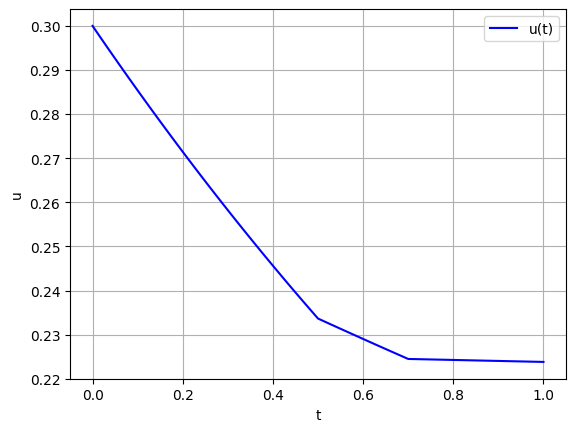

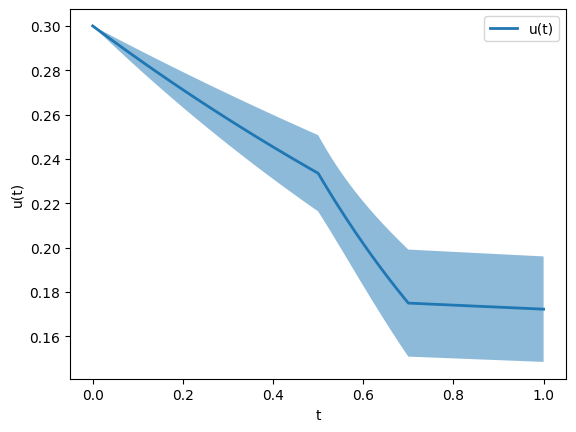

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def areaMC(a, b, M, n):
    k = 0
    for _ in range(n):
        x = np.random.uniform(a, b)
        y = np.random.uniform(0, M)

        if x**2 + y**2 <= 1:
            k += 1

    pi_estimate = (M * (b - a) * (k / n)) / 4.0
    return pi_estimate

i = 20
while i <= 128000:
    print(i, areaMC(-1, 1, 1, i))
    i = i * 2

def modelo(u0, t, c0, c1, c2):
    u = u0
    def c(x):
        if x < 0.5:
            return c0
        elif 0.05 <= x < 0.7:
            return c1
        else:
            return c2

    dudt = -c(t) * u
    return dudt

y0 = [0.3]
t = np.linspace(0, 1, 101)
c0 = 0.2
c1 = 0.5
c2 = 0.01
sol = odeint(modelo, y0, t, args=(c1, c0, c2))

plt.plot(t, sol[:, 0], 'b', label='u(t)')
plt.xlabel('t')
plt.ylabel('u')
plt.legend()
plt.grid()
plt.show()

y0 = [0.3]
t = np.linspace(0, 1, 101)

num_avals = 1000
avals_sol = []
for k in range(num_avals):
    c0 = np.random.normal(0.5, 0.15)
    c1 = np.random.uniform(0.5, 2.5)
    c2 = np.random.uniform(0.03, 0.075)

    sol = odeint(modelo, y0, t, args=(c0, c1, c2))
    avals_sol.append(sol[:, 0])

def plot_mean_std(ax, time, evals, textlabel):
    mean = np.mean(evals, axis=0)
    sdev = np.std(evals, axis=0)
    ax.plot(time, mean, lw=2, label=textlabel)
    ax.fill_between(time, (mean-sdev), (mean+sdev), alpha=0.5)

plt.figure()
plot_mean_std(plt, t, avals_sol, 'u(t)')
plt.legend()
plt.ylabel('u(t)')
plt.xlabel('t')
plt.show()


Exercicio 2 - Simule o movimento browniano considerando T = 100 e
h = 0.01. Plote o gráfico da simulação, ou seja Wt em
função de t.

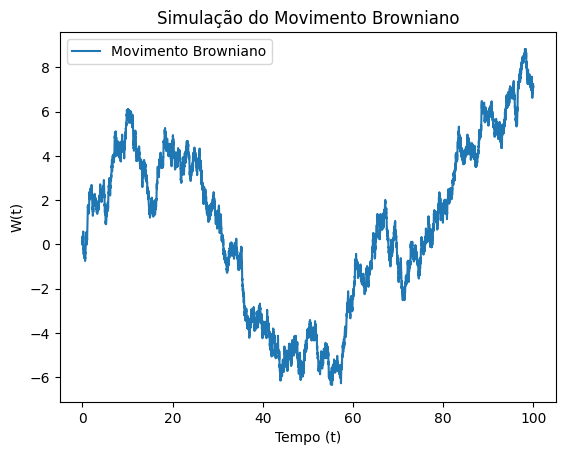

In [45]:
def brownian_motion(T, h):
    num_steps = int(T / h)
    t = np.linspace(0, T, num_steps + 1)
    W = np.zeros(num_steps + 1)

    for i in range(1, num_steps + 1):
        dW = np.sqrt(h) * np.random.normal(0, 1)
        W[i] = W[i-1] + dW

    return t, W

# Parâmetros da simulação
T = 100
h = 0.01

# Simulação do movimento browniano
t, W = brownian_motion(T, h)

# Plotando o gráfico
plt.plot(t, W, label='Movimento Browniano')
plt.title('Simulação do Movimento Browniano')
plt.xlabel('Tempo (t)')
plt.ylabel('W(t)')
plt.legend()
plt.show()


Relatório:
Neste código desenvolvemos um sistema que se comporta de maneira estocástica, ou sejam, não se pode determinar seu comportamento dado suas condições iniciais.Para isso, utilizamos de duas importantes técnicas o Método de Monte Carlo e o Método de Movimento Browniano.
Inicialmente utilizamos o método do Monte Carlo que funciona prevendo um conjunto de resultados com base em um intervalo de valores estimados em relação a valores fixos. Por fim, ela calcula os resultados sucessivamente cada vez usando um conjunto aleatório entre os valores máximos e mínimos. Demonstramos a versatilidade do método ao aplicá-lo para estimar o valor de π/4 através da geração aleatória de pontos em um quadrado e a contagem da proporção de pontos dentro de um círculo.
Já o método de Movimento Browniano é originário do comportamento aleatório de partículas num fluído, o código trabalha com o tempo total de simulações, acrescidas de tempo e número de trajetórias a serem simuladas. Este método captura a natureza errática do movimento browniano, caracterizado por deslocamentos aleatórios e contínuos ao longo do tempo.
Concluído o desenvolvimento do programa, é possível visualizar como ambas as técnicas são eficientes na obtenção de resultados apartir de intervalos aleatórios de dados. Ao combinar estes métodos temos uma forte ferramenta para a modelagem computacional de fenômenos físicos, matemáticos, biológicos e financeiros.